## 1. Pendahuluan

**Artificial Neural Networks (ANN)** adalah model komputasi yang terinspirasi dari cara kerja otak manusia. Neural networks telah menjadi fondasi dari **Deep Learning** dan digunakan dalam berbagai aplikasi:

- **Image Recognition** (pengenalan gambar)
- **Speech Recognition** (pengenalan suara)
- **Natural Language Processing** (NLP)
- **Recommendation Systems** (sistem rekomendasi)
- **Game Playing** (AlphaGo, dll)

### Keras dan TensorFlow

**Keras** adalah high-level API untuk membangun neural networks yang berjalan di atas **TensorFlow**. Keras menyediakan interface yang mudah dipahami untuk:
- Membangun model neural network
- Training dan evaluasi model
- Menyimpan dan memuat model

In [1]:
# Import libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Cek versi
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0
Keras version: 3.13.0


## 2. Biological Neurons vs Artificial Neurons

### Biological Neurons

Neuron biologis terdiri dari:
- **Dendrites**: Menerima sinyal dari neuron lain
- **Cell Body (Soma)**: Memproses sinyal
- **Axon**: Mengirimkan sinyal ke neuron lain
- **Synapses**: Koneksi antar neuron

### Artificial Neurons

Artificial neuron (juga disebut **unit** atau **node**) adalah representasi matematis:

$$y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) = f(\mathbf{w}^T \mathbf{x} + b)$$

Dimana:
- $x_i$ = input features
- $w_i$ = weights (bobot)
- $b$ = bias
- $f$ = activation function
- $y$ = output

In [2]:
# Visualisasi sederhana artificial neuron
def simple_neuron(inputs, weights, bias, activation='sigmoid'):
    """
    Simulasi sederhana satu artificial neuron
    """
    # Weighted sum
    z = np.dot(inputs, weights) + bias
    
    # Activation function
    if activation == 'sigmoid':
        output = 1 / (1 + np.exp(-z))
    elif activation == 'relu':
        output = np.maximum(0, z)
    elif activation == 'tanh':
        output = np.tanh(z)
    else:
        output = z  # linear
    
    return output

# Contoh
inputs = np.array([1.0, 2.0, 3.0])
weights = np.array([0.5, -0.3, 0.8])
bias = 0.1

output = simple_neuron(inputs, weights, bias, 'sigmoid')
print(f"Input: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Output (sigmoid): {output:.4f}")

Input: [1. 2. 3.]
Weights: [ 0.5 -0.3  0.8]
Bias: 0.1
Output (sigmoid): 0.9168


## 3. Perceptron

**Perceptron** adalah neural network paling sederhana, ditemukan oleh Frank Rosenblatt (1957). 

### Karakteristik Perceptron:
- Single layer neural network
- Menggunakan **step function** sebagai activation
- Dapat melakukan **linear classification**

### Perceptron Learning Rule:

$$w_{i,j}^{(next)} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i$$

Dimana:
- $\eta$ = learning rate
- $y_j$ = target output
- $\hat{y}_j$ = predicted output

In [3]:
# Implementasi Perceptron dengan Scikit-Learn
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset Iris
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa vs others (binary)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Evaluate
accuracy = perceptron.score(X_test_scaled, y_test)
print(f"Perceptron Accuracy: {accuracy:.2%}")

Perceptron Accuracy: 100.00%


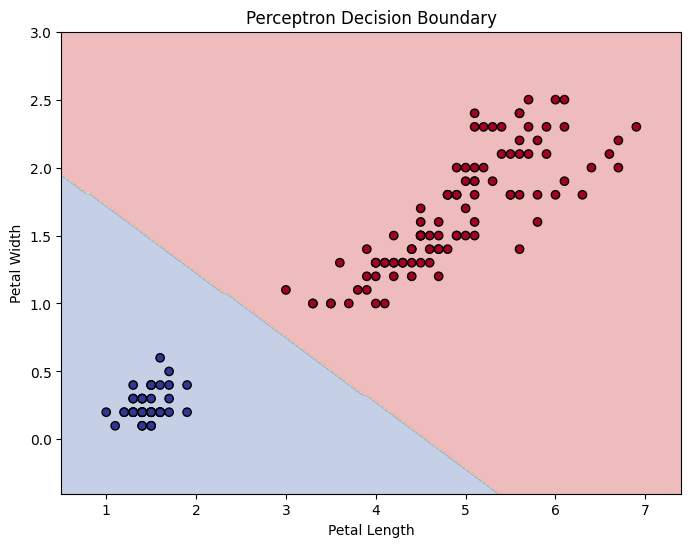

In [4]:
# Visualisasi Decision Boundary Perceptron
def plot_decision_boundary(model, X, y, scaler=None, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        X_grid = scaler.transform(X_grid)
    
    Z = model.predict(X_grid).reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.show()

plot_decision_boundary(perceptron, X, y, scaler, "Perceptron Decision Boundary")

### Keterbatasan Perceptron

Perceptron **tidak dapat** menyelesaikan masalah yang **tidak linearly separable**, seperti **XOR problem**.

Solusi: **Multi-Layer Perceptron (MLP)**

## 4. Multi-Layer Perceptron (MLP)

**MLP** atau **Feedforward Neural Network** terdiri dari:

1. **Input Layer**: Menerima features
2. **Hidden Layer(s)**: Memproses informasi (bisa lebih dari satu)
3. **Output Layer**: Menghasilkan prediksi

### Activation Functions

Activation functions menambahkan **non-linearity** pada neural network:

| Function | Formula | Range | Use Case |
|----------|---------|-------|----------|
| Sigmoid | $\sigma(z) = \frac{1}{1+e^{-z}}$ | (0, 1) | Binary classification output |
| Tanh | $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | (-1, 1) | Hidden layers (centered) |
| ReLU | $\text{ReLU}(z) = \max(0, z)$ | [0, ∞) | Hidden layers (default) |
| Softmax | $\sigma(z)_i = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | (0, 1) | Multiclass classification |

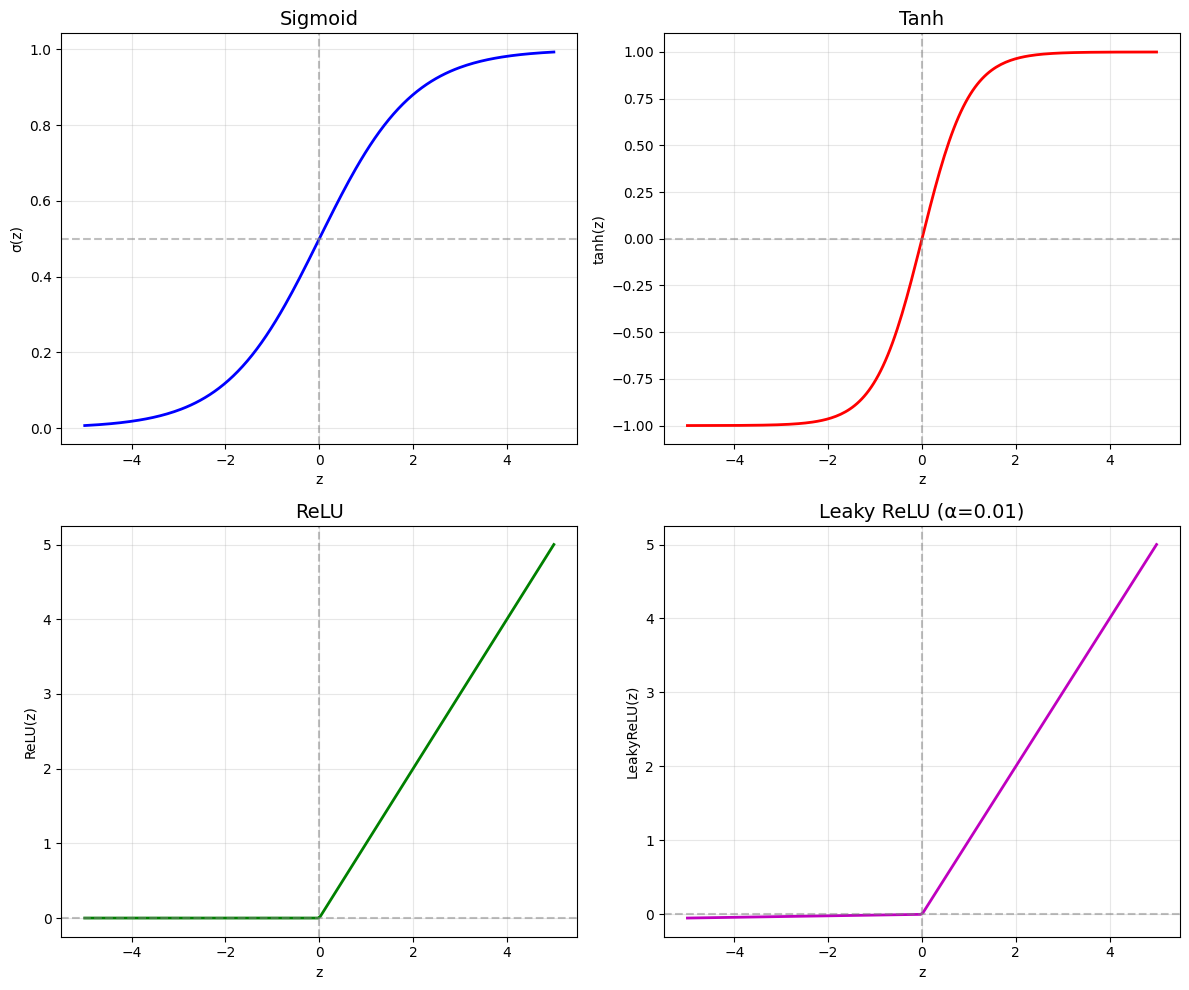

In [5]:
# Visualisasi Activation Functions
z = np.linspace(-5, 5, 200)

# Activation functions
sigmoid = 1 / (1 + np.exp(-z))
tanh = np.tanh(z)
relu = np.maximum(0, z)
leaky_relu = np.where(z > 0, z, 0.01 * z)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(z, sigmoid, 'b-', linewidth=2)
axes[0, 0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 0].set_title('Sigmoid', fontsize=14)
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('σ(z)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(z, tanh, 'r-', linewidth=2)
axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Tanh', fontsize=14)
axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('tanh(z)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(z, relu, 'g-', linewidth=2)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_title('ReLU', fontsize=14)
axes[1, 0].set_xlabel('z')
axes[1, 0].set_ylabel('ReLU(z)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(z, leaky_relu, 'm-', linewidth=2)
axes[1, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Leaky ReLU (α=0.01)', fontsize=14)
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('LeakyReLU(z)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Backpropagation

**Backpropagation** adalah algoritma untuk melatih neural network dengan menghitung gradient dari loss function terhadap setiap weight.

**Langkah-langkah:**
1. **Forward Pass**: Hitung output dari input ke output layer
2. **Compute Loss**: Hitung error antara prediksi dan target
3. **Backward Pass**: Hitung gradient menggunakan chain rule
4. **Update Weights**: Perbarui weights menggunakan gradient descent

$$w = w - \eta \frac{\partial L}{\partial w}$$

## 5. Implementasi MLP dengan Keras

Keras menyediakan 3 cara untuk membangun model:

1. **Sequential API**: Untuk model linear stack
2. **Functional API**: Untuk model kompleks
3. **Subclassing**: Untuk custom model

### 5.1 Classification dengan Fashion MNIST

In [6]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split training into train and validation
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)
Test set shape: (10000, 28, 28)


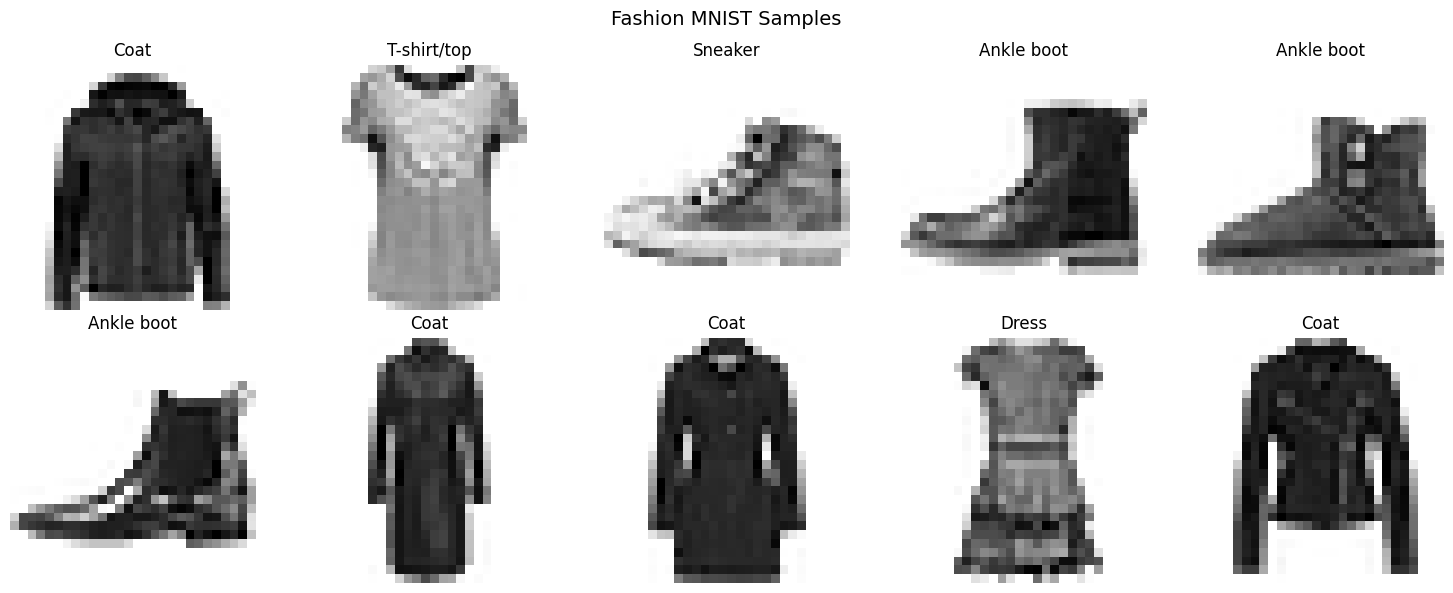

In [7]:
# Visualisasi beberapa sample
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='binary')
    ax.set_title(class_names[y_train[i]])
    ax.axis('off')
plt.suptitle('Fashion MNIST Samples', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# Membangun model dengan Sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),  # Input layer: flatten 28x28 -> 784
    keras.layers.Dense(300, activation='relu'),   # Hidden layer 1
    keras.layers.Dense(100, activation='relu'),   # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer: 10 classes
])

# Model summary
model.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',  # untuk integer labels
    optimizer='sgd',                          # Stochastic Gradient Descent
    metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


In [10]:
# Training model
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7631 - loss: 0.7068 - val_accuracy: 0.8270 - val_loss: 0.5121
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8312 - loss: 0.4845 - val_accuracy: 0.8446 - val_loss: 0.4492
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8452 - loss: 0.4395 - val_accuracy: 0.8526 - val_loss: 0.4190
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8542 - loss: 0.4130 - val_accuracy: 0.8602 - val_loss: 0.3997
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8605 - loss: 0.3939 - val_accuracy: 0.8664 - val_loss: 0.3852
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8644 - loss: 0.3786 - val_accuracy: 0.8684 - val_loss: 0.3744
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.3658 - val_accuracy: 0.8706 - val_loss: 0.3649
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8722 - loss: 0.3547 - 

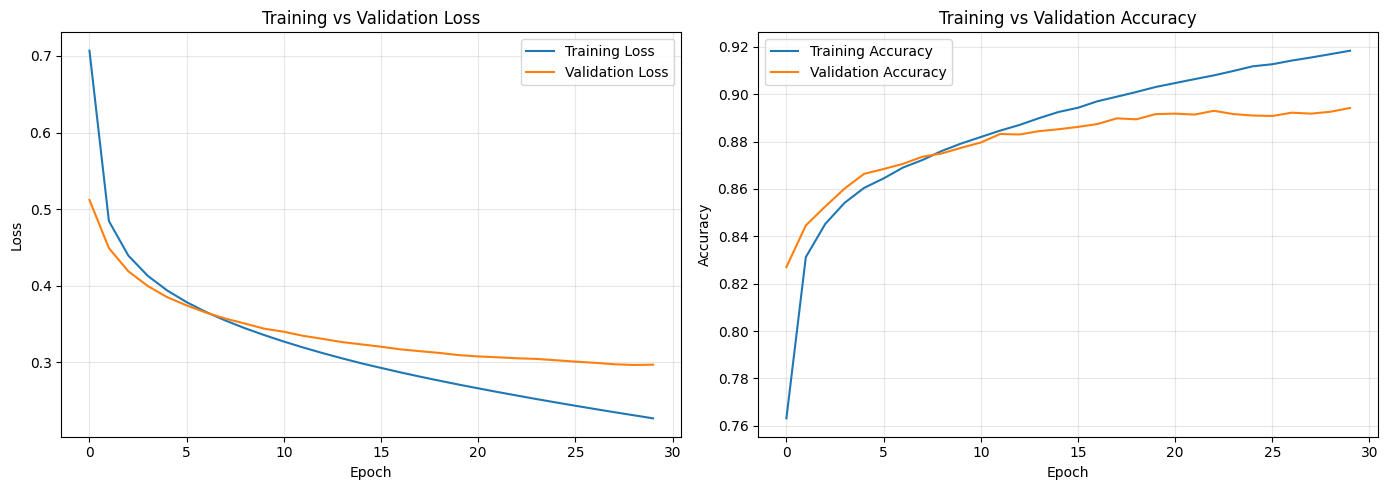

In [11]:
# Plot training history
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training vs Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training vs Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [12]:
# Evaluasi pada test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.3390
Test Accuracy: 88.16%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


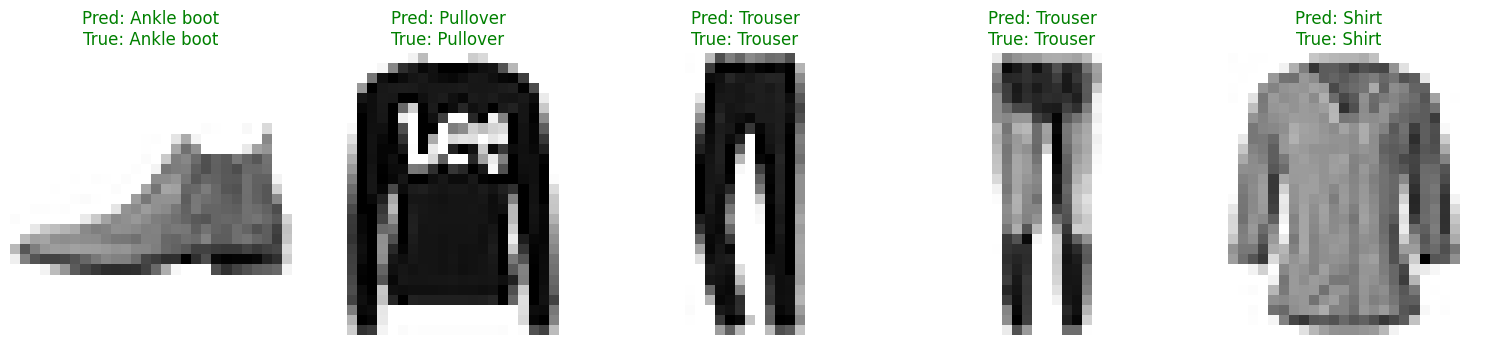

In [13]:
# Prediksi
y_pred_proba = model.predict(X_test[:5])
y_pred = np.argmax(y_pred_proba, axis=1)

# Visualisasi prediksi
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i], cmap='binary')
    ax.set_title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i]]}",
                 color='green' if y_pred[i] == y_test[i] else 'red')
    ax.axis('off')
plt.tight_layout()
plt.show()

### 5.2 Regression dengan California Housing

In [14]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Features: {housing.feature_names}")

Training set: (11610, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [15]:
# Model untuk Regression
reg_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)  # Output: single value (no activation for regression)
])

reg_model.compile(
    loss='mse',  # Mean Squared Error untuk regression
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=['mae']  # Mean Absolute Error
)

reg_model.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Training dengan Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history_reg = reg_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9349 - mae: 1.0152 - val_loss: 1.4280 - val_mae: 0.6861
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7366 - mae: 0.6447 - val_loss: 0.7021 - val_mae: 0.6071
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6476 - mae: 0.5981 - val_loss: 0.6023 - val_mae: 0.5684
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5987 - mae: 0.5689 - val_loss: 0.5595 - val_mae: 0.5424
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5622 - mae: 0.5472 - val_loss: 0.5285 - val_mae: 0.5233
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5335 - mae: 0.5307 - val_loss: 0.5042 - val_mae: 0.5090
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5105 - mae: 0.5174 - val_loss: 0.4860 - val_mae: 0.4977
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4914 - mae: 0.5064 - val_loss: 0.4810 - val_mae: 0.4891
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [17]:
# Evaluasi Regression Model
mse_test, mae_test = reg_model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test RMSE: {np.sqrt(mse_test):.4f}")

Test MSE: 0.3568
Test MAE: 0.4236
Test RMSE: 0.5973


### 5.3 Functional API

Functional API lebih fleksibel dan dapat membuat model dengan:
- Multiple inputs/outputs
- Shared layers
- Non-sequential connections

In [18]:
# Model dengan Functional API
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_layer, hidden2])  # Wide & Deep
output = keras.layers.Dense(1)(concat)

wide_deep_model = keras.models.Model(inputs=[input_layer], outputs=[output])

wide_deep_model.compile(
    loss='mse',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

wide_deep_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

### 5.4 Menyimpan dan Memuat Model

In [19]:
# Menyimpan model (SavedModel format - recommended)
# model.save('my_keras_model.keras')

# Atau dalam format HDF5
# model.save('my_keras_model.h5')

# Memuat model
# loaded_model = keras.models.load_model('my_keras_model.keras')

print("Model dapat disimpan dengan .save() dan dimuat dengan load_model()")

Model dapat disimpan dengan .save() dan dimuat dengan load_model()


### 5.5 Callbacks

**Callbacks** adalah fungsi yang dipanggil selama training untuk melakukan berbagai aksi.

In [20]:
# Berbagai Callbacks yang berguna

# 1. ModelCheckpoint - Menyimpan model terbaik
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True
)

# 2. EarlyStopping - Menghentikan training jika tidak ada improvement
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

# 3. ReduceLROnPlateau - Mengurangi learning rate jika stuck
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=5
)

# 4. TensorBoard - Visualisasi training
tensorboard_cb = keras.callbacks.TensorBoard(
    log_dir='./logs'
)

print("Callbacks tersedia: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard")

Callbacks tersedia: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard


## 6. Fine-Tuning Neural Network Hyperparameters

### Hyperparameters yang perlu di-tune:

| Hyperparameter | Typical Values | Notes |
|----------------|----------------|-------|
| Number of hidden layers | 1-5 | Start with 1-2 |
| Neurons per layer | 10-500 | Decrease or stay same |
| Learning rate | 1e-5 to 1e-1 | Critical! Start with 1e-3 |
| Batch size | 32, 64, 128, 256 | Larger = faster but may generalize worse |
| Activation function | ReLU, ELU, SELU | ReLU is default |
| Optimizer | SGD, Adam, RMSprop | Adam is often best |

In [21]:
# Perbandingan Optimizers
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'SGD with Momentum': keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001)
}

print("Popular Optimizers:")
for name, opt in optimizers.items():
    print(f"  - {name}")

Popular Optimizers:
  - SGD
  - SGD with Momentum
  - Adam
  - RMSprop


In [22]:
# Membuat fungsi untuk build model (untuk hyperparameter tuning)
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, activation='relu'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    
    return model

# Contoh: Model dengan 2 hidden layers, 100 neurons each
custom_model = build_model(n_hidden=2, n_neurons=100, learning_rate=0.01)
custom_model.summary()

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Hyperparameter Tuning dengan Keras Tuner (konsep)
# pip install keras-tuner

# from keras_tuner import RandomSearch

# def build_model_hp(hp):
#     model = keras.models.Sequential()
#     model.add(keras.layers.Flatten(input_shape=[28, 28]))
#     
#     # Tune number of layers
#     for i in range(hp.Int('n_hidden', 1, 3)):
#         model.add(keras.layers.Dense(
#             units=hp.Int(f'n_neurons_{i}', min_value=32, max_value=256, step=32),
#             activation='relu'
#         ))
#     
#     model.add(keras.layers.Dense(10, activation='softmax'))
#     
#     model.compile(
#         loss='sparse_categorical_crossentropy',
#         optimizer=keras.optimizers.Adam(
#             learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
#         ),
#         metrics=['accuracy']
#     )
#     return model

print("Keras Tuner dapat digunakan untuk automated hyperparameter search")

Keras Tuner dapat digunakan untuk automated hyperparameter search


### Tips untuk Tuning Neural Networks

1. **Learning Rate**: 
   - Terlalu tinggi → training tidak konvergen
   - Terlalu rendah → training sangat lambat
   - Gunakan learning rate scheduler

2. **Batch Size**:
   - Smaller batch → noisy gradients, better generalization
   - Larger batch → stable gradients, faster training

3. **Number of Layers/Neurons**:
   - Start simple, increase complexity if needed
   - Watch for overfitting

4. **Regularization**:
   - L2 regularization
   - Dropout
   - Early stopping

## 7. Kesimpulan

### Key Takeaways:

1. **Artificial Neural Networks** terinspirasi dari biological neurons tetapi sangat berbeda dalam implementasi.

2. **Perceptron** adalah neural network paling sederhana, hanya bisa menyelesaikan masalah linearly separable.

3. **MLP (Multi-Layer Perceptron)** dapat menyelesaikan masalah non-linear dengan hidden layers dan activation functions.

4. **Keras** menyediakan high-level API yang mudah untuk membangun neural networks:
   - Sequential API untuk model sederhana
   - Functional API untuk model kompleks

5. **Key Components**:
   - **Layers**: Dense, Flatten, dll
   - **Activation Functions**: ReLU, Sigmoid, Softmax
   - **Loss Functions**: MSE (regression), Cross-entropy (classification)
   - **Optimizers**: SGD, Adam, RMSprop
   - **Callbacks**: EarlyStopping, ModelCheckpoint, TensorBoard

6. **Hyperparameter Tuning** sangat penting untuk mendapatkan model yang optimal.
